## Assignment 1 - Linear Regression
### Name: Vikas Vijaykumar Bastewad
### Roll Number: 20CS10073

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Spliting the dataset into 50% for training, 30% for validation and 20% for testing. 

In [2]:
# Loading the dataset 
df = pd.read_csv('../../dataset/linear-regression.csv') 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Shuffling the dataset
data = df.sample(frac=1, random_state=42).reset_index(drop=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,6
1,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,5
2,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,6
3,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,5
4,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6,6


In [4]:
# Spliting the dataset into features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Normalizing the features using (Min-Max Scaling)
X_normalized = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Spliting the dataset into training, validation, and test sets
train_size = int(0.5 * len(data))
val_size = int(0.3 * len(data))
X_train, y_train = X_normalized[:train_size], y[:train_size]
X_val, y_val = X_normalized[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X_normalized[train_size+val_size:], y[train_size+val_size:]

2. Using the mean squared error loss function to fit the models. 

In [5]:
# Defining the mean squared error loss function
def mean_squared_error_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Defining the function to calculate r2 score
def cal_r2_score(y_true, y_pred):
    y_mean = np.mean(y_true)
    return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - y_mean) ** 2))


3. Formulating the linear regression models for the given data set.

In [6]:
# First Model - Analytic Solution
X_train_1 = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
theta_analytic = np.dot(np.dot(np.linalg.inv(np.dot(X_train_1.T, X_train_1)), X_train_1.T), y_train)
# Here theta_analytic is the vector of parameters, i.e. theta_analytic = [theta_0, theta_1, ..., theta_n]
# where theta_0 is the intercept and theta_1, ..., theta_n are the coefficients of the independent variables
# calculation of the theta is as follows
# theta = (X^T * X)^-1 * X^T * y
# where X is the augmented matrix of the independent variables and y is the vector of the dependent variable

# Augmenting validation set with ones
X_val_1 = np.concatenate((np.ones((X_val.shape[0], 1)), X_val), axis=1)

# Predicting using the learned parameters on validation set
y_pred_val_analytic = np.dot(X_val_1,theta_analytic)

# Calculate R-squared and RMSE for the analytic model on validation set
r2_val_analytic = cal_r2_score(y_val, y_pred_val_analytic)  # cal_r2_score is a function that calculates R-squared (defined above)
rmse_val_analytic = np.sqrt(mean_squared_error_loss(y_val, y_pred_val_analytic))

# Displaying results for the first model using analytic solution
print("First Model - Analytic Solution")
print("=====================================================================================================")
print("Analytic Solution (Validation Set):")
print("R-squared:", r2_val_analytic)
print("RMSE:", rmse_val_analytic)

# Predicting using the learned parameters on test set
X_test_1 = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
y_pred_test_analytic = np.dot(X_test_1,theta_analytic)

# Calculating R-squared and RMSE for the analytic model on test set
r2_test_analytic = cal_r2_score(y_test, y_pred_test_analytic)  # cal_r2_score is a function that calculates R-squared (defined above)
rmse_test_analytic = np.sqrt(mean_squared_error_loss(y_test, y_pred_test_analytic))

# Displaying the results for the first model using analytic solution
print("\nAnalytic Solution (Test Set):")
print("R-squared:", r2_test_analytic)
print("RMSE:", rmse_test_analytic)
print("=====================================================================================================")

First Model - Analytic Solution
Analytic Solution (Validation Set):
R-squared: 0.2894510183280409
RMSE: 0.6901349433054016

Analytic Solution (Test Set):
R-squared: 0.4057707102674537
RMSE: 0.5993990056751543


Second Model - Gradient Ascent:
Number of Iterations: 10000
Best Learning Rate: 0.01
R-squared: 0.06833729789690746
RMSE: 0.8036985528269445


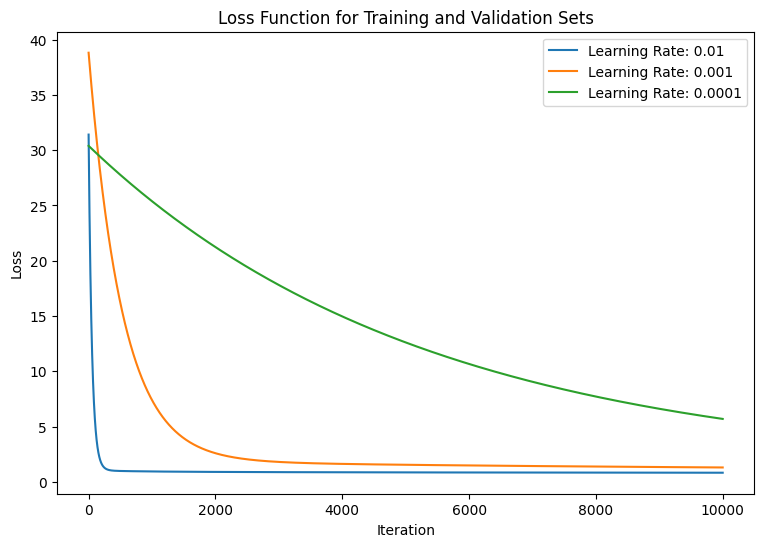

In [7]:
# Second Model - Gradient Ascent
learning_rates = [0.01, 0.001, 0.0001] 
num_iterations = 10000  # Number of iterations for gradient ascent
losses = {lr: [] for lr in learning_rates}  # Losses for each learning rate

# Plotting loss function for different learning rates
plt.figure(figsize=(9, 6))
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Function for Training and Validation Sets")

best_lr = None  # Best learning rate 
best_r2 = -float('inf') # Best R-squared value for validation set

for lr in learning_rates:       # Training the model for each learning rate
    theta_ga = np.random.randn(X_train.shape[1])  # Initializing the parameters
    
    for i in range(num_iterations): # Running gradient ascent for num_iterations
        y_pred = np.dot(X_train,theta_ga) # Predicting on the training set
        error = y_pred - y_train # Calculating the error
        gradient = np.dot(X_train.T,error) # Calculating the gradient
        theta_ga -= lr * gradient / len(y_train) # Updating the parameters
        loss = mean_squared_error_loss(y_train, y_pred) # Calculating the loss
        losses[lr].append(loss) # Storing the loss for each iteration
        
        # Validating the model using validation set
        y_pred_val = np.dot(X_val,theta_ga) 
        r2_val = cal_r2_score(y_val, y_pred_val) #cal_r2_score is defined in step 2
        
        if r2_val > best_r2:   # Finding the best learning rate
            best_r2 = r2_val   # Updating the best R-squared value
            best_lr = lr       # Updating the best learning rate
    
    # Ploting the losses for each learning rate
    plt.plot(losses[lr], label=f"Learning Rate: {lr}")


# Training the model using the best learning rate on the entire training set
theta_ga_best = np.random.randn(X_train.shape[1])       # Initializing the parameters
for _ in range(num_iterations):                         # Running gradient ascent for num_iterations
    y_pred = np.dot(X_train,theta_ga_best)              # Predicting on the training set
    error = y_pred - y_train                            # Calculating the error
    gradient = np.dot(X_train.T,error)                  # Calculating the gradient
    theta_ga_best -= best_lr * gradient / len(y_train)  # Updating the parameters

# Predicting on the test set using the best model
y_pred_test_ga = np.dot(X_test,theta_ga_best)   

# Calculating R-squared and RMSE for the best model using gradient ascent on the test set
r2_test_ga = abs(cal_r2_score(y_test, y_pred_test_ga)) #cal_r2_score is defined in step 2
rmse_test_ga = np.sqrt(mean_squared_error_loss(y_test, y_pred_test_ga))

# Displaying the results for the second model using gradient ascent
print("=====================================================================================================")
print("Second Model - Gradient Ascent:")
print("Number of Iterations:", num_iterations)
print("Best Learning Rate:", best_lr)
print("R-squared:", r2_test_ga)
print("RMSE:", rmse_test_ga)
print("=====================================================================================================")

# Ploting the loss functions for different learning rates
# I have plotted the losses for each learning rate in the same plot to compare them easily
# You can easily see that the loss function for learning rate 0.01 is decreasing faster than the other two
plt.legend()
plt.show()
